This solution is submitted from Mohammed Haider.


Getting the dataset from excel file

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

df = pd.read_csv('Salaries.csv')
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [2]:
columns_number = df.columns.size
rows_number = df["Id"].size
print("rows number = " + str(rows_number))
print("columns number = " + str(columns_number))
print(df.dtypes)
df.isnull().sum()

rows number = 148654
columns number = 13
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [3]:
salaries = df["TotalPay"]
mean = st.mean(salaries)
median = st.median(salaries)
mode = st.mode(salaries)
min = np.min(salaries)
max = np.max(salaries)
range = max - min
std = st.stdev(salaries)
print("mean = " + str(mean))
print("median = " + str(median))
print("mode = " + str(mode))
print("min = " + str(min))
print("max = " + str(max))
print("range = " + str(range))
print("standard deviation = " + str(std))



mean = 74768.32197169265
median = 71426.60999999999
mode = 0.0
min = -618.13
max = 567595.43
range = 568213.56
standard deviation = 50517.00527394988


3. Handling missing data by suitable method with explain why you use it.

In [4]:
# 3.1 Droping columns that does not have any values
df = df.drop("Notes",axis=1)
df = df.drop("Status", axis=1)
# 3.2 Handle missing data by filling with mean
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18000,0.000000,400184.250000,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02000,245131.880000,137811.380000,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13000,106088.180000,16452.600000,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60000,9737.000000,182234.590000,25007.893151,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00000,0.000000,0.000000,0.000000,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco


I used the mean to fill missing values in the salary column. This is a common approach, especially when the missing values are few and the variable is approximately normally distributed.

4. Creating histograms or bar charts to visualize the distribution of salaries, and using pie charts to represent the proportion of employees in different departments.


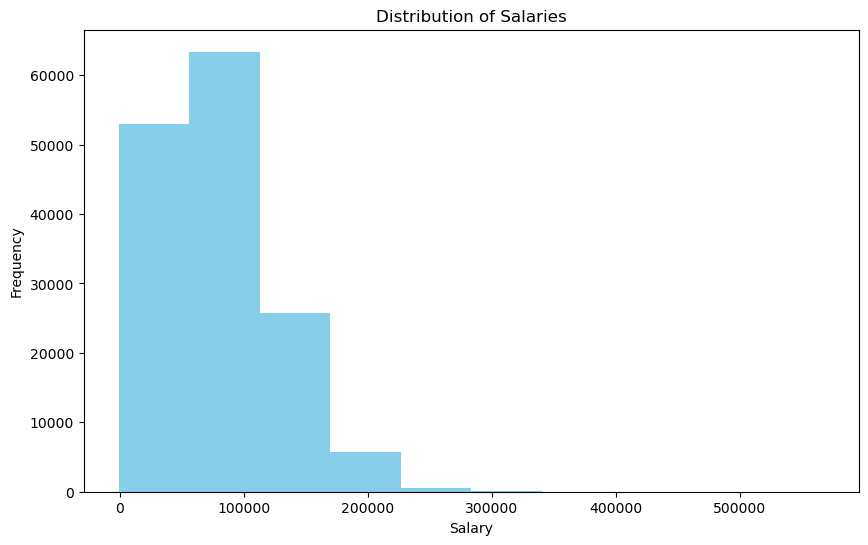

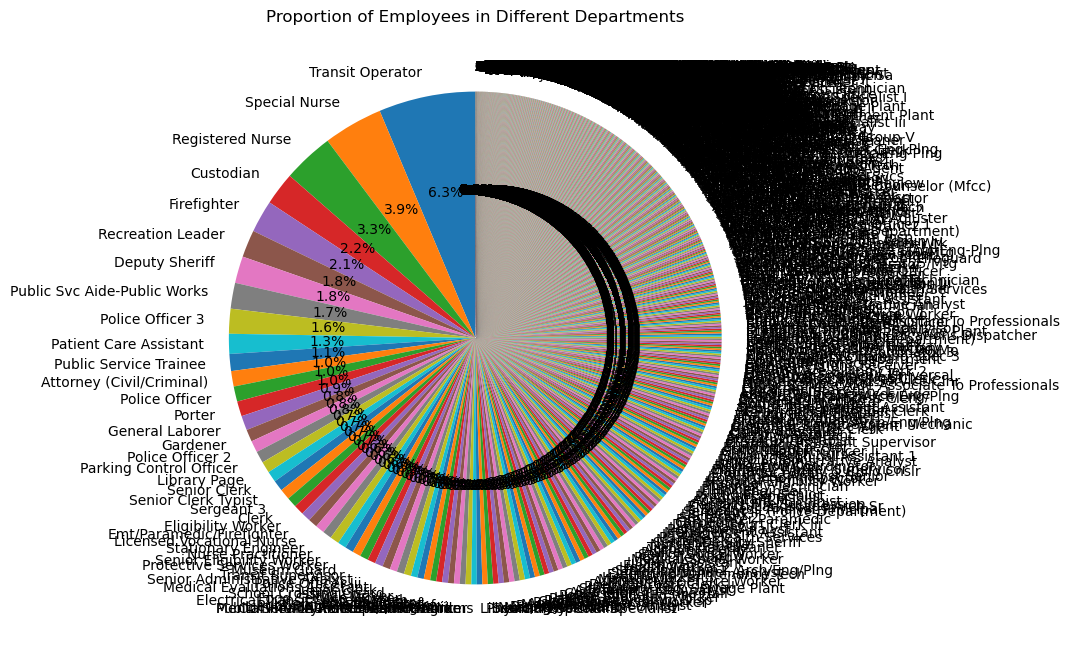

In [5]:
# 4.1 Histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=10, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 4.2 Pie chart for the proportion of employees in different departments
df["JobTitle"] = df["JobTitle"].str.title()
plt.figure(figsize=(8, 8))
department_counts = df['JobTitle'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()


5. Grouping the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [6]:
# 5 Group data by department and calculate average salary for each department
grouped_data = df.groupby("JobTitle")['TotalPay'].mean()
print("\nAverage Salary by Department:")
print(grouped_data)



Average Salary by Department:
JobTitle
Account Clerk                                     43009.395299
Accountant                                        47429.268000
Accountant I                                      62036.101250
Accountant Ii                                     67355.202699
Accountant Iii                                    79001.071547
                                                      ...     
Worker'S Compensation Supervisor I                91020.726000
X-Ray Laboratory Aide                             51212.279048
Youth Comm Advisor                                41414.307500
Youth Commission Advisor, Board Of Supervisors    53632.870000
Zoo Curator                                       66686.560000
Name: TotalPay, Length: 1637, dtype: float64


6. Identifying any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.



Correlation between Salary and Years of Experience: -0.03209039798559044


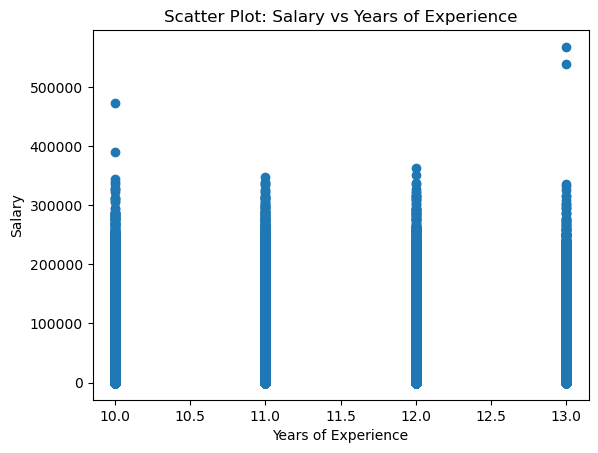

In [7]:
import datetime


# 6.1 Calculate years of experience
current_year = datetime.datetime.now().year
df['Year'] = current_year - df['Year']

# 6.2 Identify correlation between salary and years of experience
correlation = df['TotalPay'].corr(df['Year'])
print(f"\nCorrelation between Salary and Years of Experience: {correlation}")

# 6.3 Plot a scatter plot using plt
#plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['TotalPay'])
plt.title('Scatter Plot: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

